# Explainable AI using Lime and Shap

In [2]:
!pip install lime
!pip install shap



In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from lime.lime_tabular import LimeTabularExplainer


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import shap

# Using LIME
### LIME (Local Interpretable Model-agnostic Explanations) explains individual predictions by approximating the model with a simpler, interpretable model around the prediction of interest.

## Load the dataset

In [4]:
# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Preprocess the Data:

In [5]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
# Check for NaN values
if titanic.isnull().sum().any():
    print("Data contains NaN values. Filling NaN values...")
    titanic.fillna(method='ffill', inplace=True)
# Encode categorical variables
le = preprocessing.LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'].astype(str))
titanic['Pclass'] = le.fit_transform(titanic['Pclass'].astype(str))

# Define features and target
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Data contains NaN values. Filling NaN values...


C:\Users\preethas\AppData\Local\Temp\ipykernel_11588\4265884409.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic.fillna(method='ffill', inplace=True)


# Train a Random Forest Model:

In [6]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Create a LIME Explainer:

In [7]:
# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, 
                                  feature_names=X_train.columns, 
                                  class_names=['Not Survived', 'Survived'], 
                                  mode='classification')

# Select an Instance to Explain:

In [8]:
# Select an instance
instance = X_test.iloc[100]  # Change the index to select different instances

# Generate the Explanation

In [9]:
# Generate explanation
exp = explainer.explain_instance(instance.values, model.predict_proba, num_features=5)

C:\Users\preethas\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Visualize the Explanation

In [10]:
# Display the explanation
exp.show_in_notebook(show_table=True)

# Using SHAP

###### SHAP (SHapley Additive exPlanations) is a machine learning explainability tool based on Shapley values from cooperative game theory.
###### It provides a unified framework to interpret model predictions by attributing the contribution of each feature to the final prediction.
###### SHAP values measure how much each feature contributes to the difference between the model's actual output and the average output. 

Accuracy: 0.8044692737430168


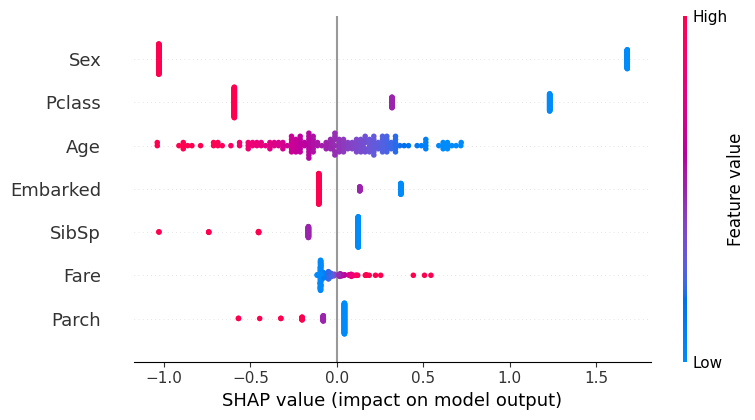

In [12]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Explain the model predictions using SHAP
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Convert SHAP values to Explanation objects
shap_values = shap.Explanation(shap_values.values, base_values=shap_values.base_values, data=X_test)

# Plot the SHAP values for a single prediction (e.g., the first prediction)
shap.initjs()  # Initialize JS visualization in notebooks
shap.force_plot(shap_values[0].base_values, shap_values[0].values, shap_values[0].data)

# Summary plot for the test set
shap.summary_plot(shap_values.values, shap_values.data, feature_names=features)